In [147]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [148]:
data = []

def parse_throughput(log_content):
    data = []
    for line in log_content:
        match = re.search(r'(\w+)\s+\d+\.\d+\s+(\d+\.\d+)\s+\d+\.\d+\s+\d+\.\d+\s+\d+\.\d+\s+\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+)', line)
        if match:
            device = match.group(1)
            read_throughput = match.group(2)
            write_throughput = match.group(3)
            data.append((device, read_throughput, write_throughput))
    
    return data

def parse_disk_utilization(log_content):
    utils = []

    for line in log_content:
        match = re.search(r'(\w+)(?:\s+\d+\.\d+)*\s+(\d+\.\d+)', line)
        if match:
            device = match.group(1)
            util = min(100,float(match.group(2)))
            utils.append((device, util))
            
    return utils

with open('./Background load/disk_throughput.log', 'r') as file:
    log_content = file.readlines()
    data = parse_throughput(log_content)
    util = parse_disk_utilization(log_content)
    
            
df = pd.DataFrame(data, columns=['device', 'read_throughput', 'write_throughput'])
util_df = pd.DataFrame(util, columns=['device', 'utilization'])

# Filter for sda devices
util_df = util_df[util_df['device'].str.contains('sda')]


df['read_throughput'] = df['read_throughput'].astype(float)
df['write_throughput'] = df['write_throughput'].astype(float)

# Convert to MB/s
df['read_throughput'] = df['read_throughput'] / 1024
df['write_throughput'] = df['write_throughput'] / 1024

# Filter for sda devices
df = df[df['device'].str.contains('sda')]

print("Max utilization: ", util_df['utilization'].max())
print("Disk average utilization: ", util_df['utilization'].mean())
print("Disk median utilization: ", util_df['utilization'].median())


Max utilization:  100.0
Disk average utilization:  99.05411308203992
Disk median utilization:  100.0


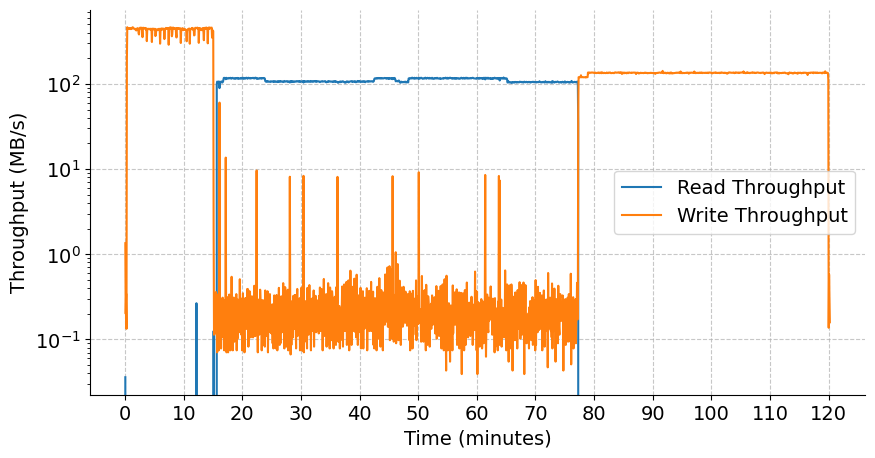

In [175]:
#plot wKB/s
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(df['read_throughput'], label='Read Throughput')
ax.plot(df['write_throughput'], label='Write Throughput')
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Throughput (MB/s)')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_yscale('log')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
# divide x tick values by 60 to get minutes
ax.xaxis.set_major_locator(mticker.MultipleLocator(600))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x / 60)))
plt.show()


Text(0.5, 1.0, 'Disk Utilisation Background Load')

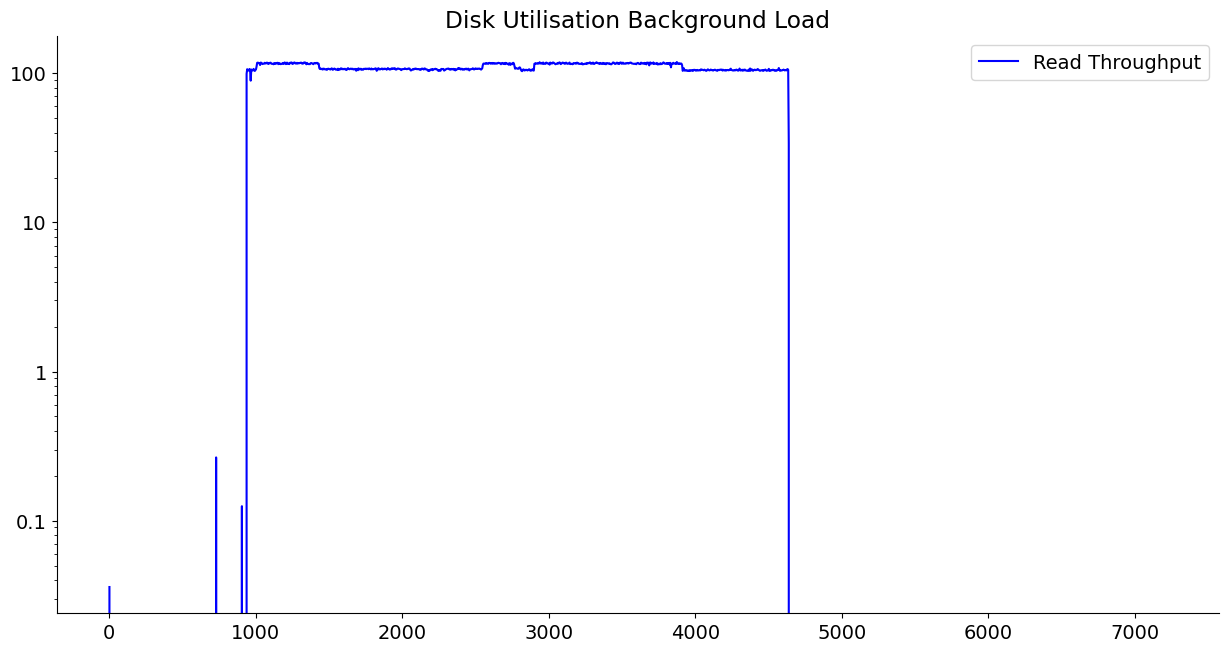

In [149]:
def moving_average(a, n=3) :
    ret = pd.Series(a).rolling(window=n).mean()
    return ret

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15, 7.5))
plt.plot(df['read_throughput'], label='Read Throughput', color='blue')
plt.yscale('log')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: '{:.16g}'.format(y)))
plt.legend()
plt.title('Disk Utilisation Background Load')

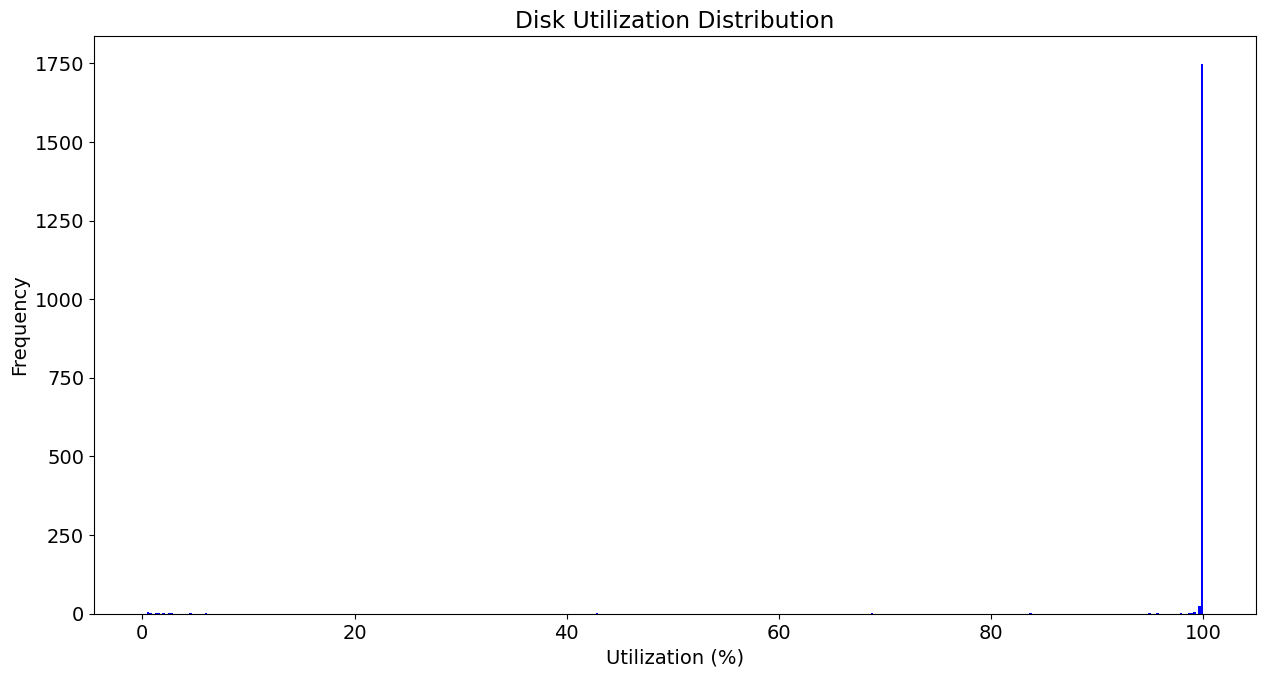

In [150]:
# print distribution of disk utilization
plt.figure(figsize=(15, 7.5))
plt.hist(util_df['utilization'], bins=400, color='blue')
plt.title('Disk Utilization Distribution')
plt.xlabel('Utilization (%)')
plt.ylabel('Frequency')
plt.show()



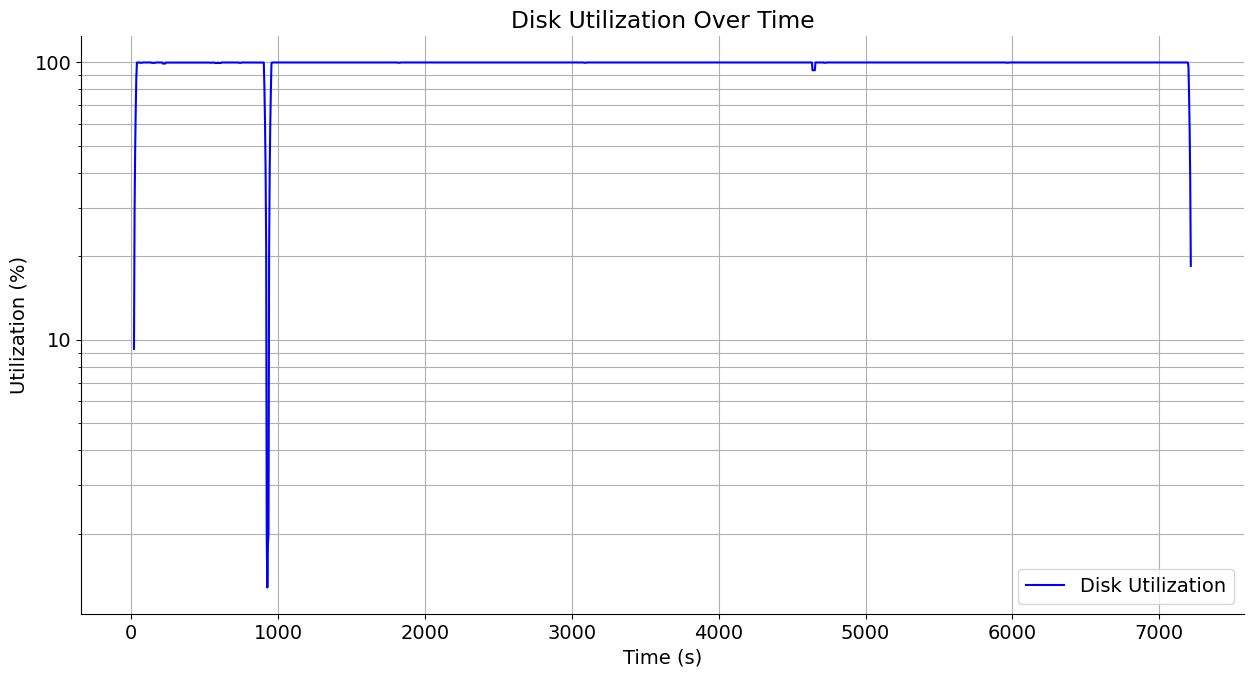

In [151]:
# plot as a function of time 
plt.figure(figsize=(15, 7.5))
plt.plot(moving_average(util_df['utilization'],5), label='Disk Utilization', color='blue')
plt.title('Disk Utilization Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Utilization (%)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, which='both')
plt.legend()
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: '{:.16g}'.format(y)))
plt.show()

C:\Users\DDJen\AppData\Local\Temp\ipykernel_46884\3840714311.py:36: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0, top=100)  # Adjust the upper limit as needed


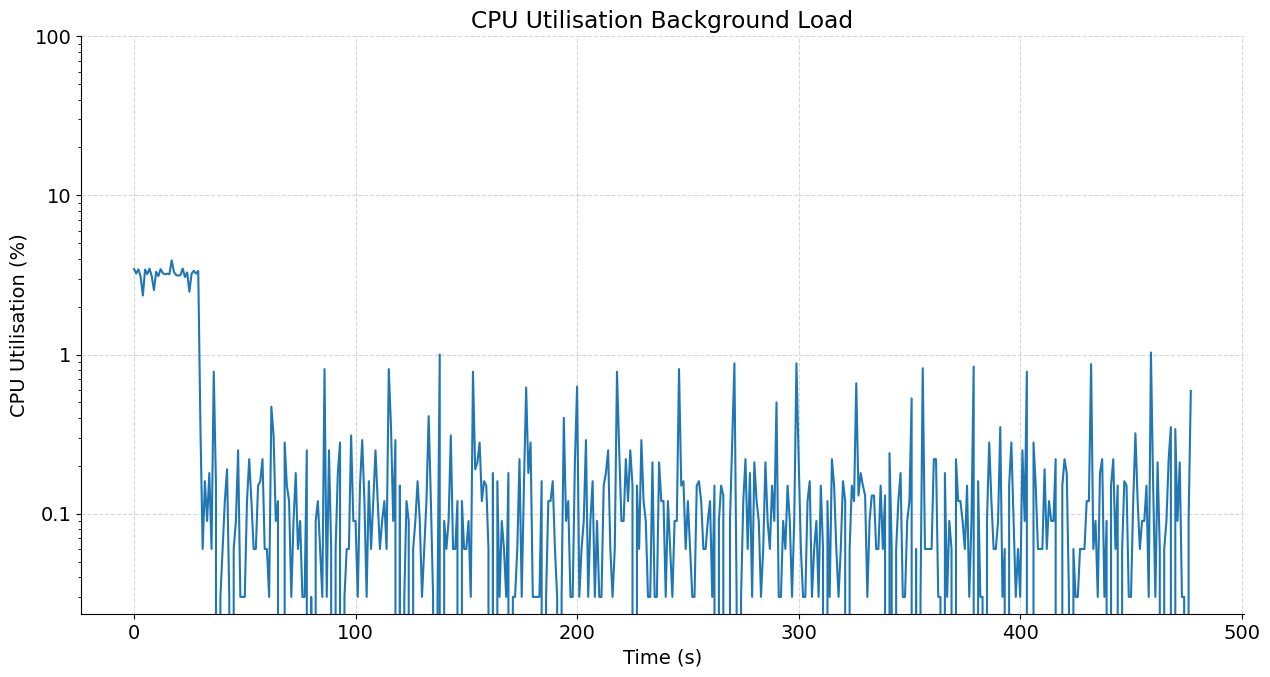

In [152]:
# Parse cpu utilisation

def parse_cpu_utilization(log_content):
    cpu_utilization = []

    for line in log_content.split('\n'):
        match = re.search(r'all\s+(\d+\.\d+)\s+\d+\.\d+\s+(\d+\.\d+)\s+(\d+\.\d+)\s+\d+\.\d+\s+\d+\.\d+', line)
        if match:
            user = float(match.group(1))
            system = float(match.group(2))
            iowait = float(match.group(3))
            total = user + system + iowait
            cpu_utilization.append(total)

    return cpu_utilization

# Read cpu utilization
cpu_utilization = []
with open('./Background load/cpu_utilization.log', 'r') as file:
    log_content = file.read()
    cpu_utilization = parse_cpu_utilization(log_content)
    
cpu_utilization = pd.Series(cpu_utilization)
plt.figure(figsize=(15, 7.5))
plt.plot(cpu_utilization, label='cpu_utilization')
plt.ylabel('CPU Utilisation (%)')
plt.xlabel('Time (s)')
plt.yscale('log')

# Format y-ticks
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: '{:.16g}'.format(y)))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, alpha=0.5, linestyle='--')
# Set y-axis limits
plt.ylim(bottom=0, top=100)  # Adjust the upper limit as needed

plt.title('CPU Utilisation Background Load')
plt.show()


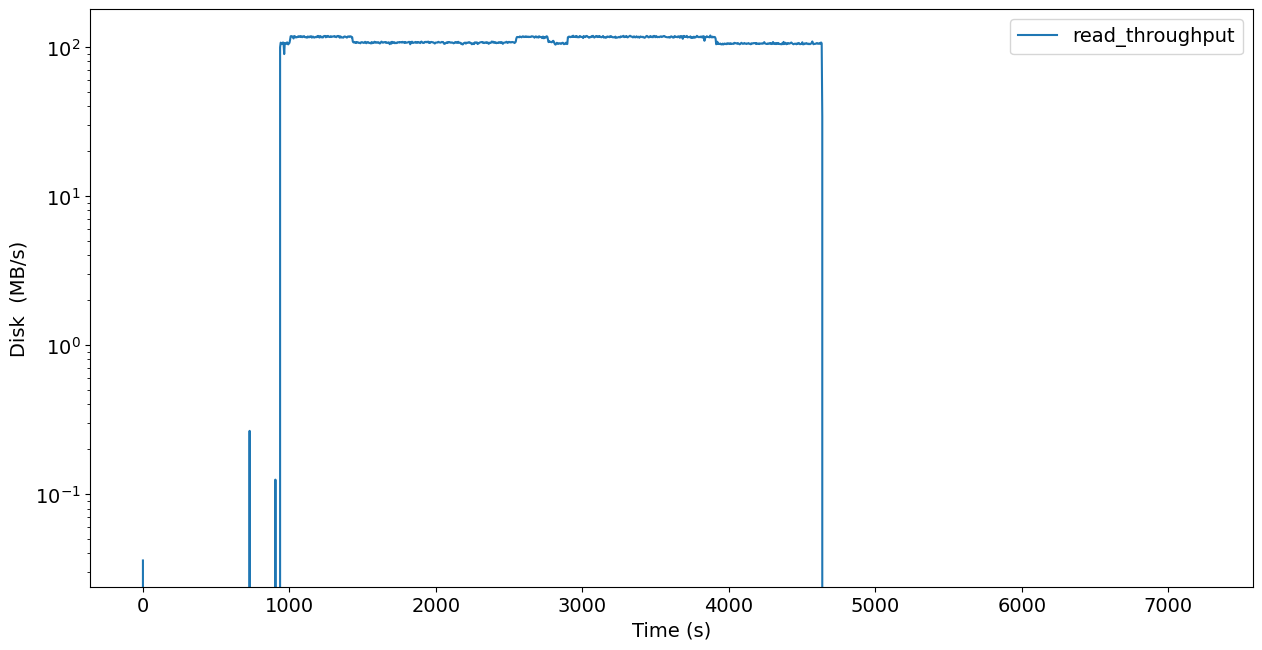

In [153]:
# Plot read throughput
plt.figure(figsize=(15, 7.5))
plt.plot(df['read_throughput'], label='read_throughput')
plt.yscale('log')
plt.ylabel('Disk  (MB/s)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()